# card data 시각화
## 기간에 따른 card data 변화

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (14,4)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


path = '/Library/Fonts/NanumBarunpenRegular.otf'
fontprop = fm.FontProperties(fname=path, size=18)

In [4]:
card = pd.read_csv('card.csv')

card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


In [5]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777647 entries, 0 to 3777646
Data columns (total 7 columns):
receipt_dttm            int64
adstrd_code             int64
adstrd_nm               object
mrhst_induty_cl_code    int64
mrhst_induty_cl_nm      object
selng_cascnt            object
salamt                  object
dtypes: int64(3), object(4)
memory usage: 201.7+ MB


In [6]:
card['adstrd_code'] = card['adstrd_code'].astype(str)
card['exp']=card['adstrd_code'].apply(lambda x:x[:5])

In [7]:
gu_card = card.loc[card['exp']=='11740',:].reset_index()

gu_card.head()

,index,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,exp
0,0,20200104,1174066000,성내3동,7041,약국,463,5843230,11740
1,1,20200104,1174066000,성내3동,7022,치과의원,33,7835550,11740
2,2,20200104,1174066000,성내3동,7021,한의원,53,4589800,11740
3,3,20200104,1174066000,성내3동,7020,의원,339,9267240,11740
4,4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000,11740


In [8]:
gu_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159620 entries, 0 to 159619
Data columns (total 9 columns):
index                   159620 non-null int64
receipt_dttm            159620 non-null int64
adstrd_code             159620 non-null object
adstrd_nm               159620 non-null object
mrhst_induty_cl_code    159620 non-null int64
mrhst_induty_cl_nm      159620 non-null object
selng_cascnt            159620 non-null object
salamt                  159620 non-null object
exp                     159620 non-null object
dtypes: int64(3), object(6)
memory usage: 11.0+ MB


In [9]:
gu_card['mrhst_induty_cl_code'] = gu_card['mrhst_induty_cl_code'].astype(str)

#gu_card['receipt_dttm'] = gu_card['receipt_dttm'].astype(str)
#gu_card['month'] = gu_card['receipt_dttm'].apply(lambda x:x[5:7])
gu_card['receipt_dttm'] = pd.to_datetime(gu_card['receipt_dttm'], format='%Y%m%d')

gu_card.head()

,index,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,exp
0,0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230,11740
1,1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550,11740
2,2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800,11740
3,3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240,11740
4,4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000,11740


In [10]:
gu_card['mrhst_induty_cate'] = gu_card['mrhst_induty_cl_code'].apply(lambda x:x[:2])
    
cate_list = []

for x in gu_card['mrhst_induty_cate']:
    if not x in cate_list:
        cate_list.append(x)

cate_list.sort()
print(len(cate_list))
print(cate_list)

33
['10', '11', '20', '21', '22', '30', '31', '32', '33', '34', '40', '41', '42', '43', '44', '50', '51', '52', '60', '61', '70', '71', '80', '81', '82', '83', '84', '90', '91', '92', '93', '96', '99']


In [11]:
gu_card['mrhst_induty_large_cate'] = gu_card['mrhst_induty_cl_code'].apply(lambda x:x[:1])

gu_card.head()

,index,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,exp,mrhst_induty_cate,mrhst_induty_large_cate
0,0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230,11740,70,7
1,1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550,11740,70,7
2,2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800,11740,70,7
3,3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240,11740,70,7
4,4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000,11740,61,6


### 8. 음식 관련 업종
#### 매출 건수

In [27]:
plotdata80 = plotdata.loc[plotdata['mrhst_induty_cate']=='80']
plotdata81 = plotdata.loc[plotdata['mrhst_induty_cate']=='81']
plotdata82 = plotdata.loc[plotdata['mrhst_induty_cate']=='82']
plotdata83 = plotdata.loc[plotdata['mrhst_induty_cate']=='83']
plotdata84 = plotdata.loc[plotdata['mrhst_induty_cate']=='84']

In [28]:
plotdata = gu_card.loc[gu_card['mrhst_induty_large_cate']=='8',:]
plotdata['selng_cascnt'] = plotdata['selng_cascnt'].astype(int)
plotdata = plotdata.groupby(['receipt_dttm','mrhst_induty_cate']).selng_cascnt.mean().reset_index()

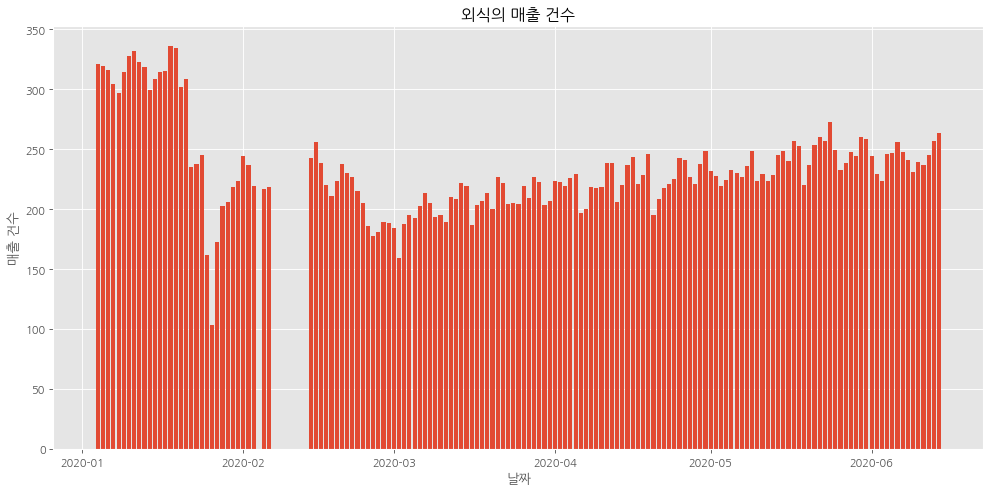

In [29]:
import matplotlib.pyplot as plt 
import matplotlib.legend as legend

plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata80['receipt_dttm'],plotdata80['selng_cascnt'])

plt.xlabel('날짜')
plt.ylabel('매출 건수')
plt.title('외식업의 매출 건수')

plt.show()

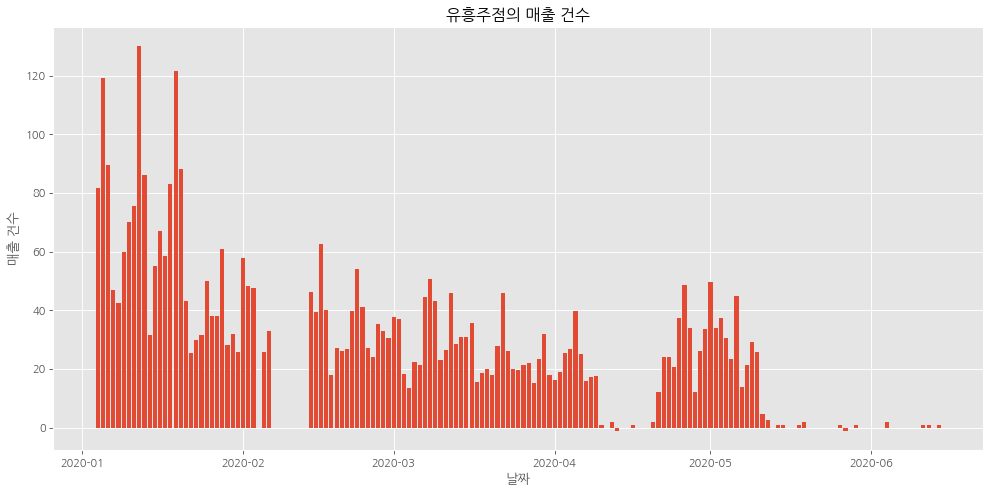

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata81['receipt_dttm'], plotdata81['selng_cascnt'])

plt.xlabel('날짜')
plt.ylabel('매출 건수')
plt.title('유흥주점의 매출 건수')

plt.show()

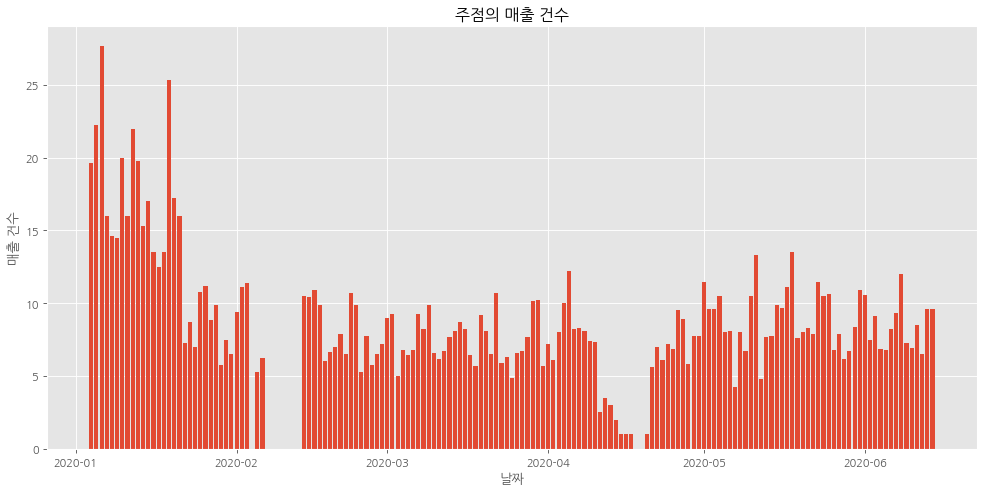

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata82['receipt_dttm'], plotdata82['selng_cascnt'])

plt.xlabel('날짜')
plt.ylabel('매출 건수')
plt.title('주점의 매출 건수')

plt.show()

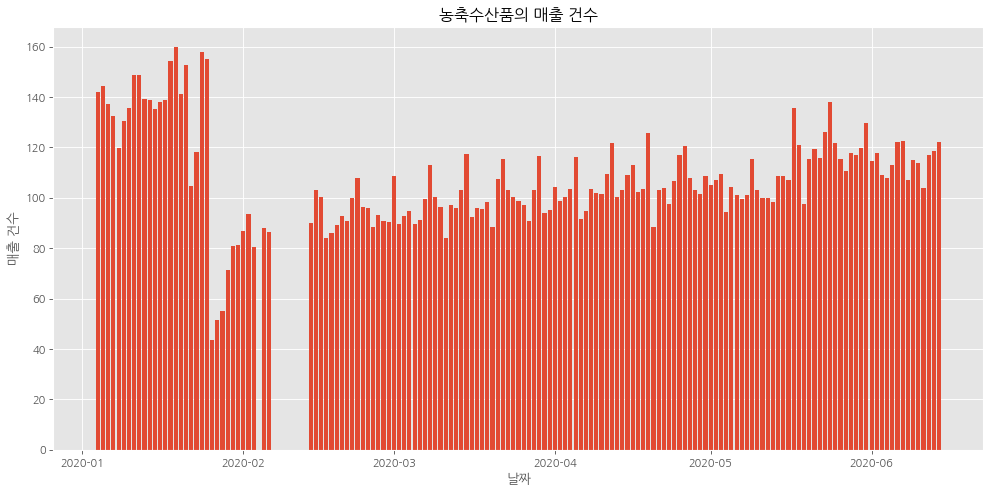

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata83['receipt_dttm'], plotdata83['selng_cascnt'])

plt.xlabel('날짜')
plt.ylabel('매출 건수')
plt.title('농축수산품의 매출 건수')

plt.show()

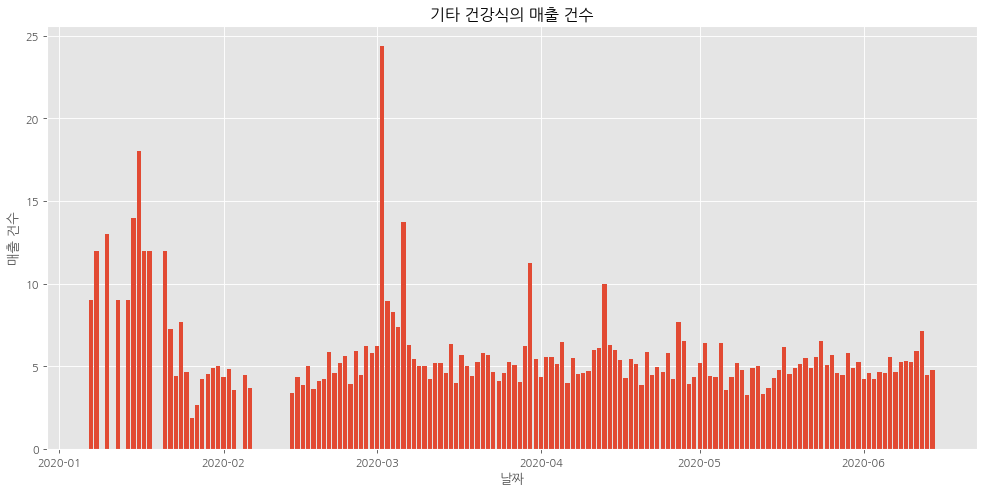

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata84['receipt_dttm'], plotdata84['selng_cascnt'])

plt.xlabel('날짜')
plt.ylabel('매출 건수')
plt.title('기타 건강식의 매출 건수')

plt.show()

#### 매출액

In [35]:
gu_card = card.loc[card['exp']=='11740',:].reset_index()

In [36]:
gu_card['mrhst_induty_cl_code'] = gu_card['mrhst_induty_cl_code'].astype(str)

#gu_card['receipt_dttm'] = gu_card['receipt_dttm'].astype(str)
#gu_card['month'] = gu_card['receipt_dttm'].apply(lambda x:x[5:7])
gu_card['receipt_dttm'] = pd.to_datetime(gu_card['receipt_dttm'], format='%Y%m%d')

In [37]:
gu_card['mrhst_induty_cate'] = gu_card['mrhst_induty_cl_code'].apply(lambda x:x[:2])

In [38]:
gu_card['mrhst_induty_large_cate'] = gu_card['mrhst_induty_cl_code'].apply(lambda x:x[:1])

In [39]:
plotdata = gu_card.loc[gu_card['mrhst_induty_large_cate']=='8',:]
plotdata['salamt'] = plotdata['salamt'].astype(int)

plotdata = plotdata.groupby(['receipt_dttm','mrhst_induty_cate']).salamt.mean().reset_index()

In [40]:
plotdata80 = plotdata.loc[plotdata['mrhst_induty_cate']=='80']
plotdata81 = plotdata.loc[plotdata['mrhst_induty_cate']=='81']
plotdata82 = plotdata.loc[plotdata['mrhst_induty_cate']=='82']
plotdata83 = plotdata.loc[plotdata['mrhst_induty_cate']=='83']
plotdata84 = plotdata.loc[plotdata['mrhst_induty_cate']=='84']

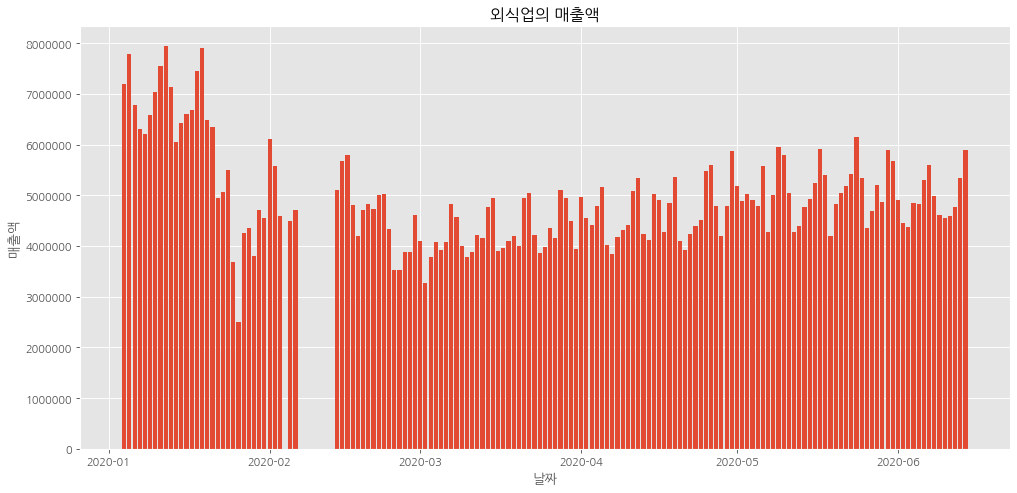

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata80['receipt_dttm'], plotdata80['salamt'])

plt.xlabel('날짜')
plt.ylabel('매출액')
plt.title('외식업의 매출액')

plt.show()

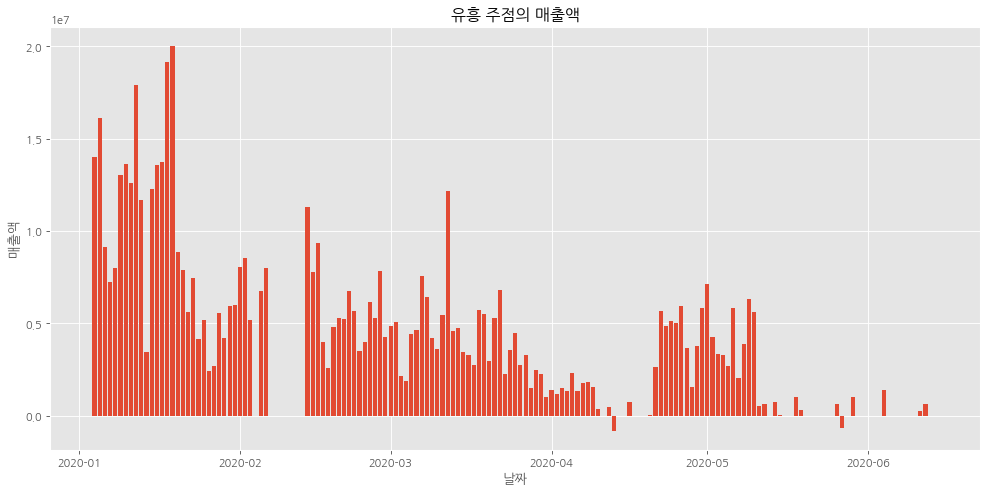

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata81['receipt_dttm'], plotdata81['salamt'])

plt.xlabel('날짜')
plt.ylabel('매출액')
plt.title('유흥 주점의 매출액')

plt.show()

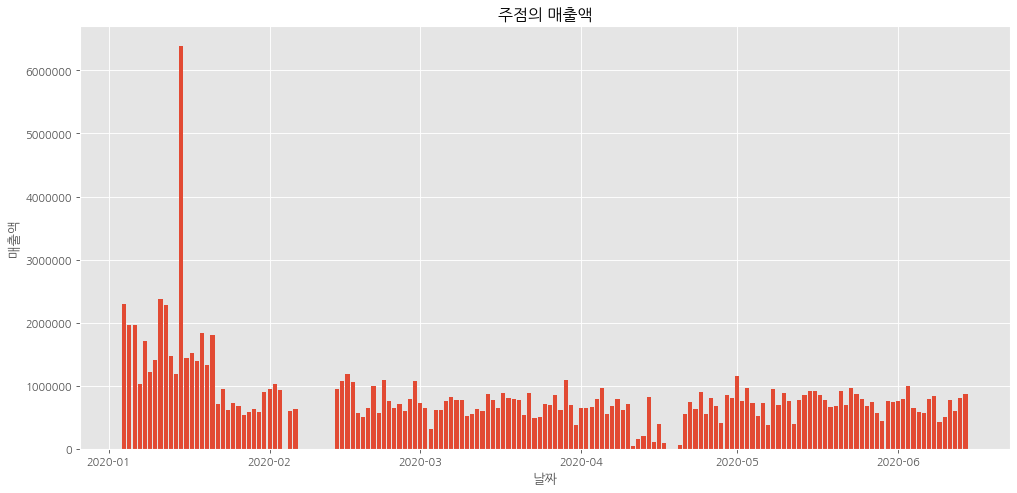

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata82['receipt_dttm'], plotdata82['salamt'])

plt.xlabel('날짜')
plt.ylabel('매출액')
plt.title('주점의 매출액')

plt.show()

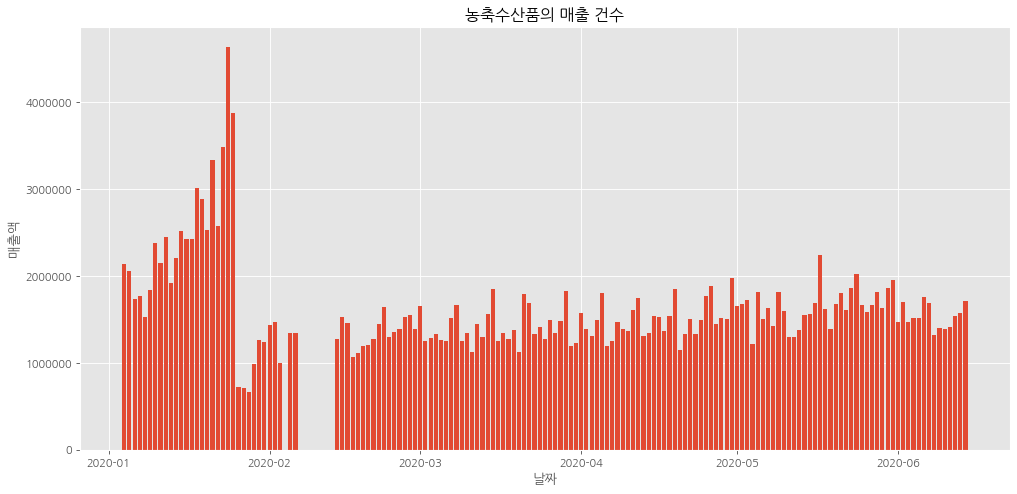

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata83['receipt_dttm'], plotdata83['salamt'])

plt.xlabel('날짜')
plt.ylabel('매출액')
plt.title('농축수산품의 매출 건수')

plt.show()

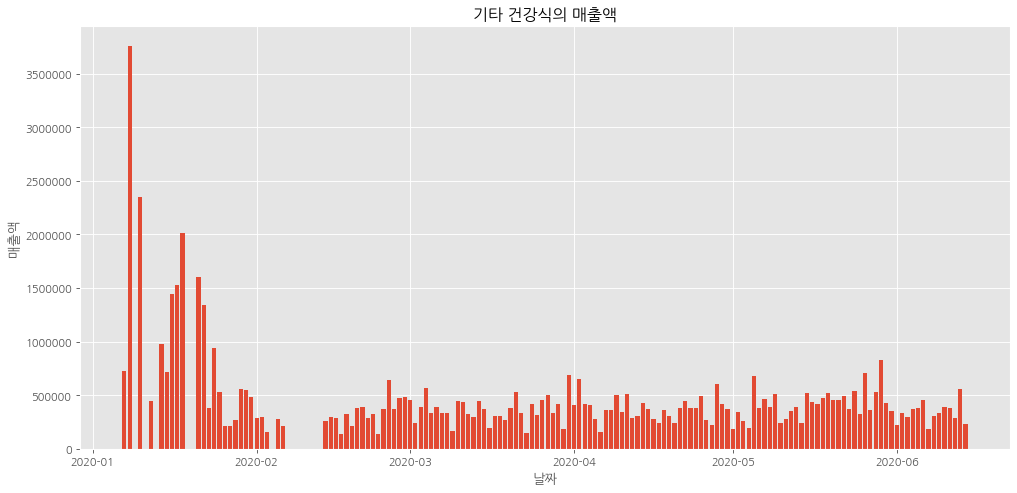

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7),dpi=80)
plt.bar(plotdata84['receipt_dttm'], plotdata84['salamt'])

plt.xlabel('날짜')
plt.ylabel('매출액')
plt.title('기타 건강식의 매출액')

plt.show()